In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
import os
train_filepath = os.path.abspath("./data/train.csv")

In [3]:
train_data = pd.read_csv(train_filepath, index_col="PassengerId")

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S



|Variable	|Definition	|Key|
|-----------|-----------|----|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	|  |
|Age	|Age in years	|   |
|sibsp	|# of siblings / spouses aboard the Titanic	|   |
|parch	|# of parents / children aboard the Titanic	|   |
|ticket	|Ticket number	|       |
|fare	|Passenger fare	|       |
|cabin	|Cabin number	|        |
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
  
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  
  
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [5]:
train_data.shape

(100000, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [7]:
#train_data=train_data.drop(columns=['Cabin']) - if we used this method we'd drop column Cabin and loose some data
# change all NaN rows in Cabin to other category - UNKNOWN
train_data['Cabin'] = train_data['Cabin'].fillna('UNKNOWN')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     100000 non-null  object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [9]:
train_data=train_data.dropna()

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91880 entries, 2 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  91880 non-null  int64  
 1   Pclass    91880 non-null  int64  
 2   Name      91880 non-null  object 
 3   Sex       91880 non-null  object 
 4   Age       91880 non-null  float64
 5   SibSp     91880 non-null  int64  
 6   Parch     91880 non-null  int64  
 7   Ticket    91880 non-null  object 
 8   Fare      91880 non-null  float64
 9   Cabin     91880 non-null  object 
 10  Embarked  91880 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,91880.000000,91880.000000,91880.000000,91880.000000,91880.000000,91880.000000
mean,0.423520,2.072312,38.516882,0.394384,0.465596,45.404697
std,0.494119,0.838325,18.303124,0.850912,0.962805,70.774805
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.230000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,25.160000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,34.432500
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


average titanic passenger has middle socio-economic status and 38 age old

<AxesSubplot:xlabel='Pclass', ylabel='count'>

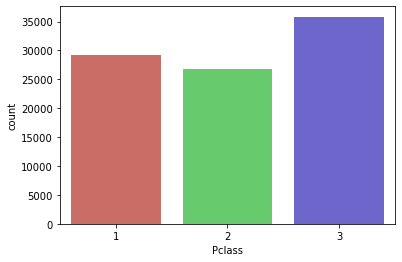

In [12]:
sns.countplot(x = 'Pclass', data = train_data,
            palette = 'hls' 
            )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

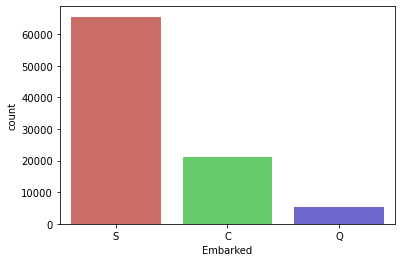

In [13]:
sns.countplot(x = 'Embarked', data = train_data,palette = 'hls')

<Figure size 1152x576 with 0 Axes>

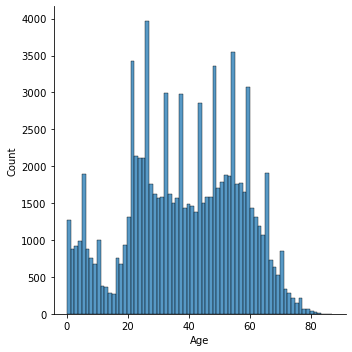

In [14]:
plt.figure(figsize=(16,8))
sns.displot(x = 'Age', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

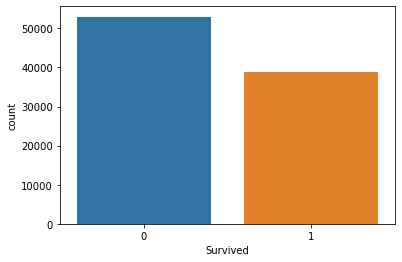

In [15]:
sns.countplot(x = 'Survived', data = train_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

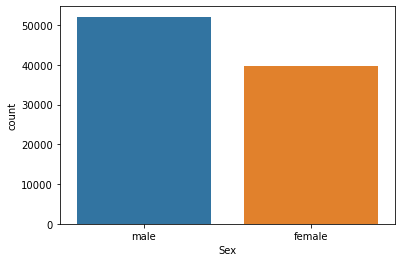

In [16]:
sns.countplot(x = 'Sex', data = train_data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

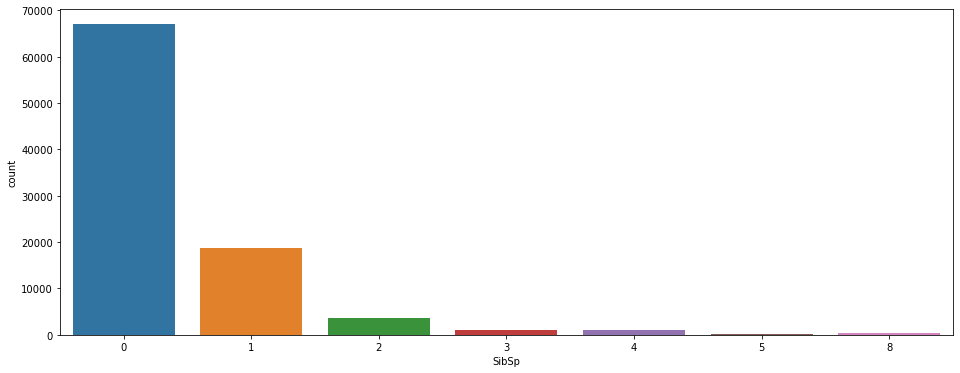

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'SibSp', data = train_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

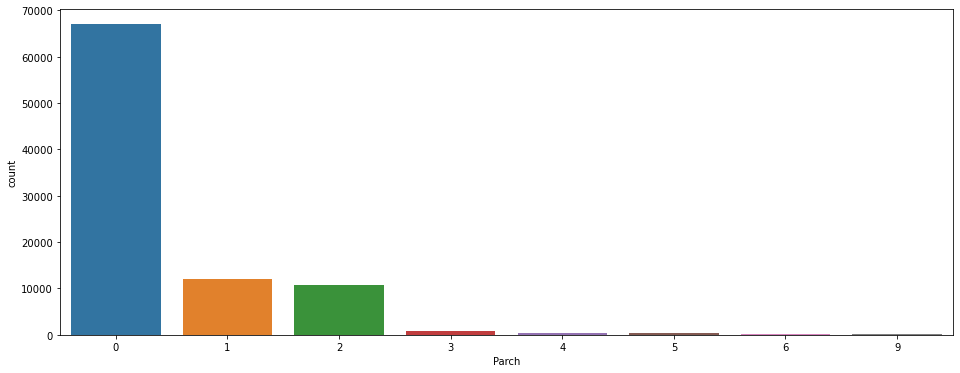

In [18]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'Parch', data = train_data)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

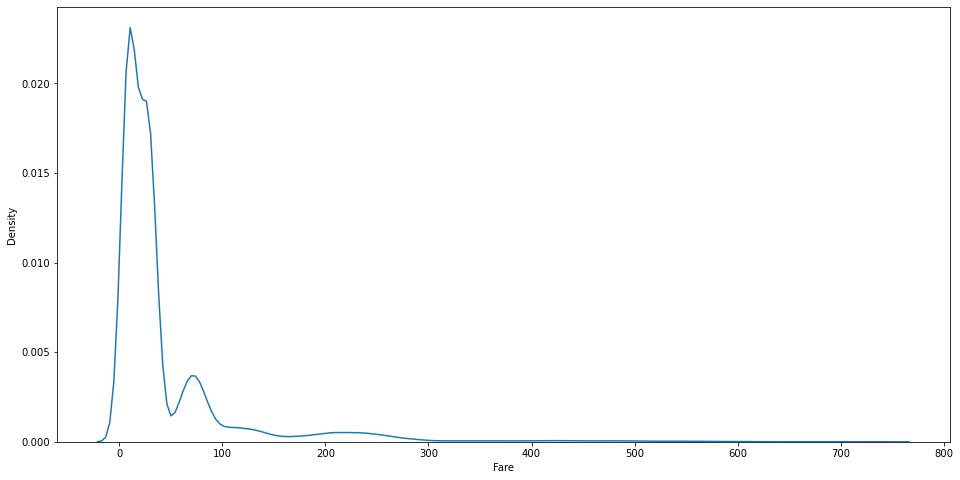

In [37]:
plt.figure(figsize=(16,8))
sns.kdeplot(x = 'Fare', data = train_data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

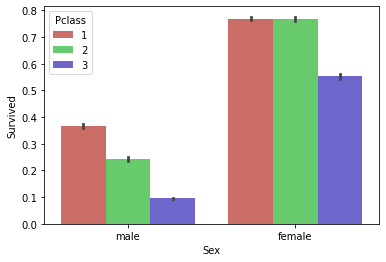

In [20]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            )

<AxesSubplot:xlabel='Survived', ylabel='count'>

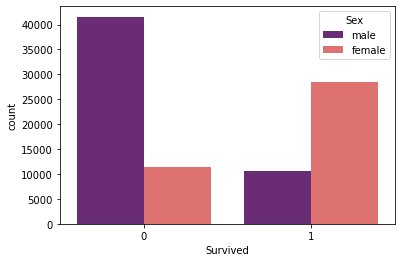

In [21]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data, palette = 'magma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

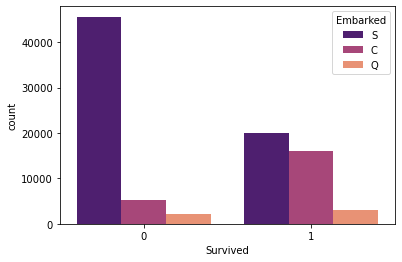

In [22]:
sns.countplot(x ='Survived', hue = 'Embarked', data = train_data, palette = 'magma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

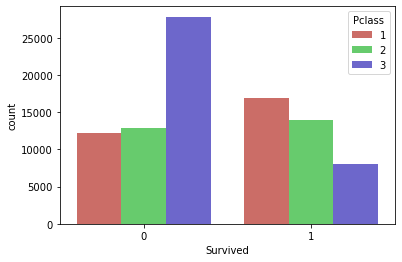

In [23]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data,
            palette = 'hls' 
            )